In [1]:
import numpy as np
import h5py

from scripts import dlc_rnn
import matplotlib.pyplot as plt

from scipy.signal import medfilt

Using TensorFlow backend.
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflo

In [134]:
def getFeedForwardTimeSeries(h5filePath = '/home/ishan/honors_thesis/joint_angles/ja_072212_163153.h5',timeSeriesName = 'joint_angles', modelPath = '/home/ishan/honors_thesis/models/flyRNN_batchsize=32.hdf5', NN_type = '1 layer', gputouse=1):
    h5f = h5py.File(h5filePath)[timeSeriesName] #read in time series
    indx = np.random.randint(h5f.shape[0]) #pick random index to get consecutive 1000-time series from
    X_drive = np.array(h5f)[indx:indx+1000, np.newaxis, :] #subset array, reshape for RNN
    
    if NN_type == '1 layer':
        model = dlc_rnn.LSTM1Dense1(mpath=modelPath, gputouse=gputouse).model
    elif NN_type == '2 layers':
        model = dlc_rnn.LSTM2Dense1(mpath=modelPath, gputouse=gputouse).model
    
    ff = np.empty((2000,1,30))
    preds = model.predict(X_drive)
    last_pred = preds[-1][np.newaxis,...]
    ff_pred = model.predict(last_pred)
    ff[0,:,:] = ff_pred
    for i in range(1,2000):
        ff[i,:,:] = model.predict(ff[i-1:i,:,:]) 
    return ff, X_drive

In [164]:
ff_preds, X_drive = getFeedForwardTimeSeries(h5filePath = filePath)
X_drive = X_drive*(180/np.pi)
ff_preds = ff_preds*(180/np.pi)

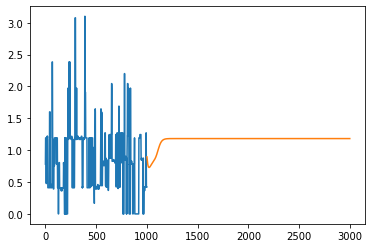

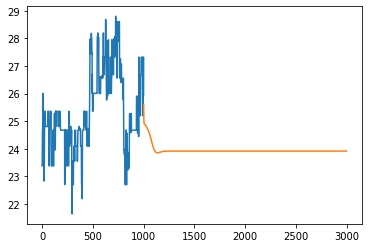

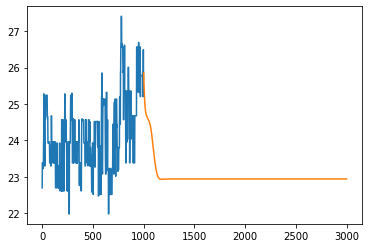

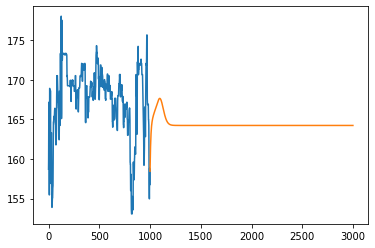

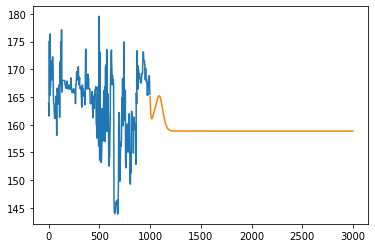

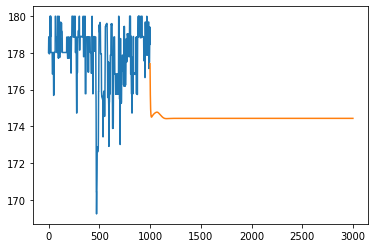

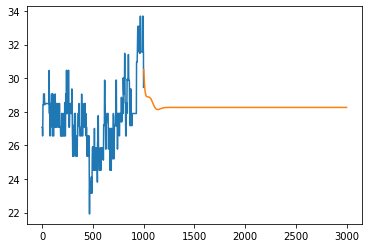

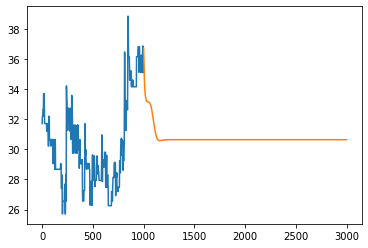

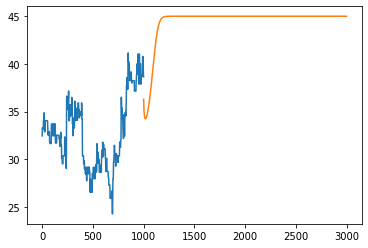

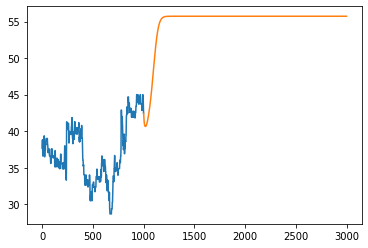

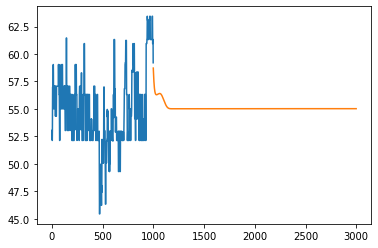

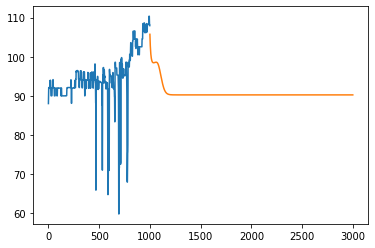

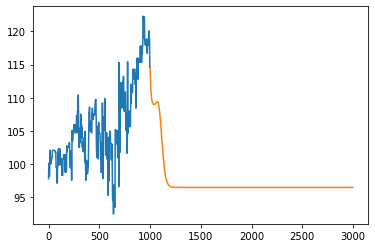

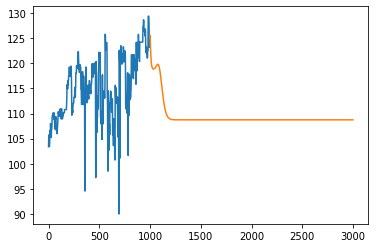

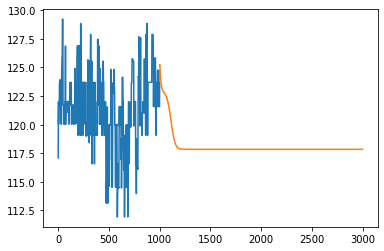

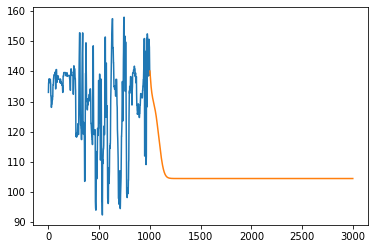

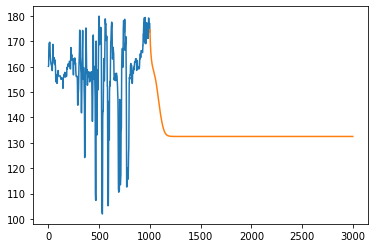

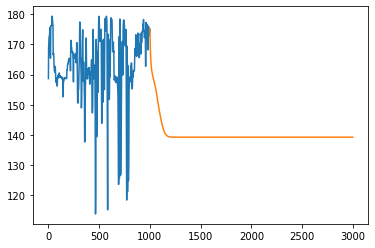

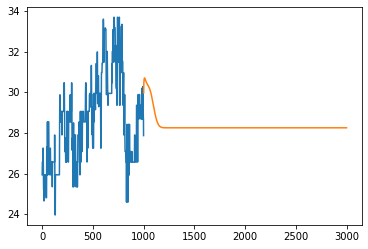

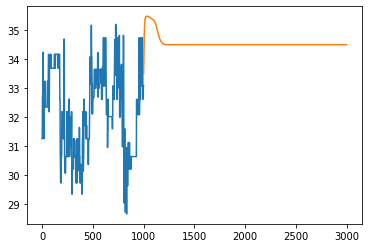

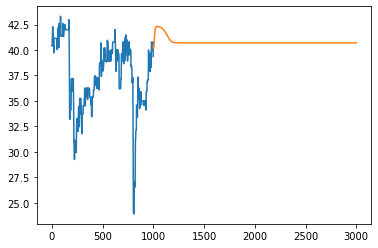

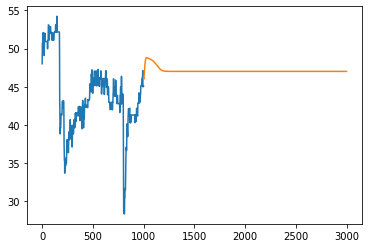

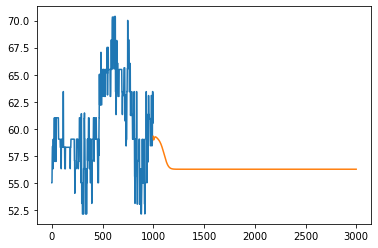

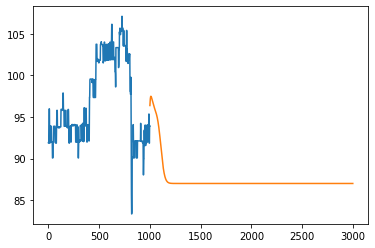

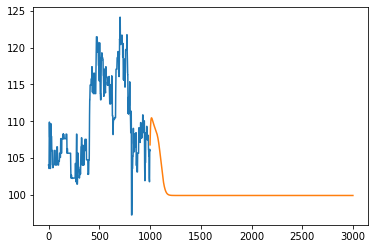

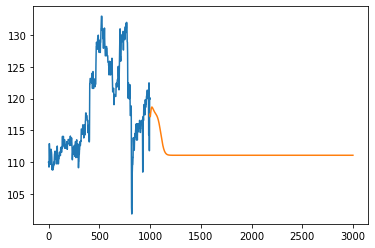

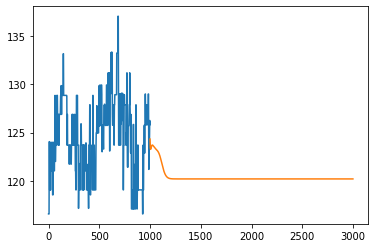

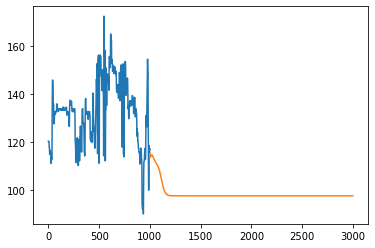

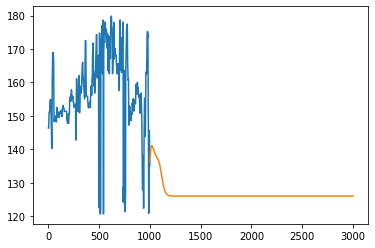

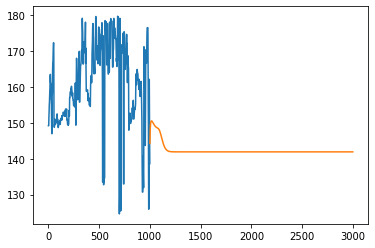

In [189]:
%matplotlib inline
x = range(3000)
angle = 2
X_mf = medfilt(Xssh _drive[:,0,angle],kernel_size=7)

#plt.plot(x[:1000], X_drive[:,0,angle], label='X drive')
fig, axes = plt.subplot(10, 3, figsize=(14,30))
for ang in range(30):
    ax = axes[ang//3][ang%3]
    X_mf = medfilt(X_drive[:,0,ang],kernel_size=5)
    ax.plot(x[:1000], X_mf)
    ax.plot(x[1000:], ff_preds[:,0,ang], label='feed forward predictions')

In [ ]:
fig, ax = plt.subplot()

In [8]:
filePath = '/home/ishan/honors_thesis/joint_angles/ja_072212_163153.h5'
h5f = h5py.File(filePath)['joint_angles']
indx = np.random.randint(h5f.shape[0])
X_drive = np.array(h5f)[indx:indx+1000,np.newaxis,:]
modelPath = '/home/ishan/honors_thesis/models/flyRNN_batchsize=32.hdf5'
model = dlc_rnn.LSTM1Dense1(mpath=modelPath, gputouse=1)

array([[0.01950902, 0.4298045 , 0.43346646, 2.93870068, 2.87795544,
        3.08024359, 0.52383322, 0.60978884, 0.51970261, 0.59993494,
        0.99837756, 1.49909663, 1.67049241, 1.82932758, 2.079247  ,
        2.22066832, 2.73647332, 2.80488396, 0.47793984, 0.47683975,
        0.25417459, 0.26452237, 0.99310887, 1.51879346, 1.66984546,
        1.80092549, 2.07810116, 2.12931919, 2.61242533, 2.67450547]])

In [21]:
last_pred = preds[-1][np.newaxis,...]

In [33]:
model.model.predict(ff_preds[i-1,:,:])

NameError: name 'ff_preds' is not defined

In [ ]:
ff_preds